# Nama : Achmad Rifki
# NIM    : 09011381823122
## UAS Artificial Intelligence
<br />
<br />
Analis Data Penumpang Kapal Titanic

In [1]:
#Imports
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns # import seaborn
import matplotlib.pyplot as plt


import warnings
warnings.filterwarnings('ignore')

In [2]:
titanic_train = pd.read_csv('train.csv')
titanic_test = pd.read_csv('test.csv')

In [3]:
titanic_train.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## Beberapa pengamatan yang didapat dari head data frame :
1.Terdapat 11 feature dan satu respon variable "survived". <br />
2.PassangerId dapat mewakili indeks data frame <br />
3.Pclass terlihat seperti categorial variable <br />
4.Beberapa cabin terlihat kehilangan beberapa data <br />

In [4]:
titanic_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


Data set train terlihat beberapa kolom kehilangan beberapa value : <br />
1.Age <br />
2.Cabin (terlihat di pengamatan sebelumnya) <br />
3.Embarked <br />

In [5]:
titanic_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


Data set test terlihat beberapa kolom kehilangan beberapa value : <br />
1.Age <br />
2.Cabin (terlihat di pengamatan sebelumnya) <br />
3.Fare <br />

In [6]:
titanic_train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [7]:
titanic_train.describe(include=['O'])

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Artagaveytia, Mr. Ramon",male,347082,C23 C25 C27,S
freq,1,577,7,4,644


Terlihat disini : <br />
1.Tidak ada nama yang sama. <br />
2.Ada 3 value (nilai yang berbeda untuk Embarked) <br />

## Data Cleaning
Untuk membersihkan kumpulan data ini, saya ingin memastikan bahwa setiap kolom bebas dari nilai NaN dan memiliki jenis yang benar. Seperti disebutkan sebelumnya, kolom Age, Embarked, dan Cabin semuanya memiliki nilai yang hilang. <br />

Mari lihat kolom Age

In [8]:
print("Age broken down by P-class")
titanic_train.groupby('Pclass').mean()[['Age']]

Age broken down by P-class


,Age
Pclass,
1,38.233441
2,29.877630
3,25.140620


Saya akan menghitung kolom Age berdasarkan Age rata-rata per penumpang yang ditentukan oleh kolom Pclass untuk kumpulan data pelatihan dan pengujian karena kedua kolom ini berisi data yang hilang dan kurang dari 25% kolom tersebut adalah data yang hilang.

In [9]:
titanic_train.loc[titanic_train.Age.isnull(), 'Age'] = titanic_train.groupby('Pclass')['Age'].transform('mean')
titanic_test.loc[titanic_test.Age.isnull(), 'Age'] = titanic_test.groupby('Pclass')['Age'].transform('mean')

Cek kembali baris 5 dan 17 untuk memastikan usia 25 terinput ke baris 5 dan 29 terinput ke baris 17.

In [10]:
titanic_train.iloc[[5, 17]]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
5,6,0,3,"Moran, Mr. James",male,25.14062,0,0,330877,8.4583,NaN,Q
17,18,1,2,"Williams, Mr. Charles Eugene",male,29.87763,0,0,244373,13.0000,NaN,S


Karena banyaknya nilai yang hilang untuk kolom Cabin di dataset train dan test, saya akan mengdropnya dari keduanya.

In [11]:
titanic_train = titanic_train.drop('Cabin', axis=1)
titanic_test = titanic_test.drop('Cabin', axis=1)

Juga karena Embarked hanya kehilangan dua nilai dari dataset train dan fare hanya kehilangan satu nilai dari dataset test, saya hanya akan menghubungkan nilai-nilai ini dengan mode dan nilai median untuk masing-masing kolom.

In [12]:
titanic_train['Embarked'].fillna(titanic_train['Embarked'].mode()[0], inplace=True)
titanic_test['Fare'].fillna(titanic_test['Fare'].median(), inplace = True)

Pastikan seluruh kolom tidak memiliki nilai null

In [13]:
print('Training Data Null Values')
print(titanic_train.isnull().sum())
print("-" * 30)
print('Test Data Null Values')
print(titanic_test.isnull().sum())

Training Data Null Values
PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64
------------------------------
Test Data Null Values
PassengerId    0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64


Terlihat bahwa seluruh kolom telah terisi

## Exploratory Data Analysis

In [14]:
titanic_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


Karena tujuannya adalah untuk dapat memprediksi kolom Survived kita perlu melihat keseimbangan kelas dari kolom itu.

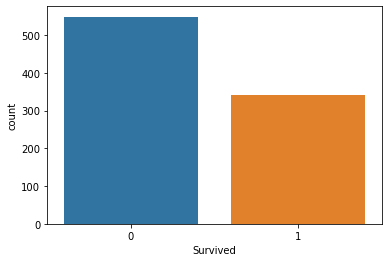

In [15]:
sns.countplot(x='Survived', data=titanic_train)

Ada ketidakseimbangan kelas yang berarti bahwa lebih banyak orang yang tidak selamat dari titanic daripada yang bertahan dalam dataset train.

Ingin melihat bagaimana harga tiket yang dibeli oleh berbagai usia penumpang.

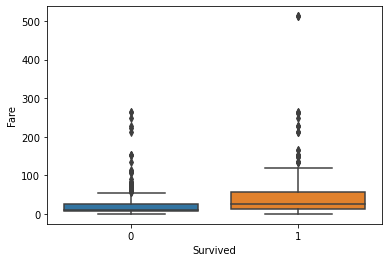

In [16]:
sns.boxplot(x = 'Survived', y = 'Fare', data = titanic_train)

In [17]:
titanic_train.groupby('Survived').mean()[['Fare']]

,Fare
Survived,
0,22.117887
1,48.395408


Sepertinya harga tiket median lebih besar bagi yang selamat. Harga tiket rata-rata jauh lebih tinggi tetapi kemungkinan besar karena outlier. Ingin menyelidiki outlier ini. Lihat di bawah dan lihat bahwa tiga orang membeli tiket dengan harga $ 512.

In [18]:
titanic_train.loc[titanic_train['Fare'] > 500, :]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
258,259,1,1,"Ward, Miss. Anna",female,35.0,0,0,PC 17755,512.3292,C
679,680,1,1,"Cardeza, Mr. Thomas Drake Martinez",male,36.0,0,1,PC 17755,512.3292,C
737,738,1,1,"Lesurer, Mr. Gustave J",male,35.0,0,0,PC 17755,512.3292,C


,Fare
Survived,
0,22.117887
1,44.289799


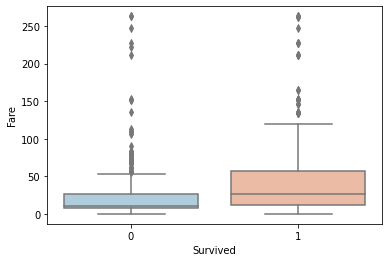

In [19]:
titanic_no_500s = titanic_train.loc[titanic_train['Fare'] < 500, :]
sns.boxplot(x = 'Survived', y = 'Fare', data = titanic_no_500s, palette = 'RdBu_r')
titanic_no_500s.groupby('Survived').mean()[['Fare']]

Dengan fare 500+ dihapus, boxplots lebih mudah dibaca. Rata-rata dan median pasti lebih tinggi bagi mereka yang selamat dan akan dimasukkan sebagai fitur untuk train model.

Mari kita lihat perbedaan penumpang laki-laki vs perempuan

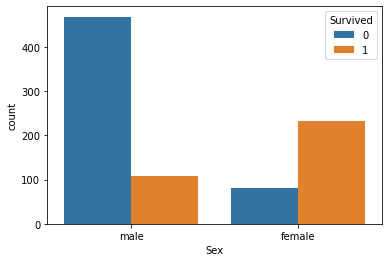

In [20]:
sns.countplot(x = 'Sex', data = titanic_train, hue = 'Survived')

Terlihat pada chart ini kebanyakan penumpang laki-laki tidak selamat dibanding penumpang perempuan.

Mari lihat pada kolom Age

[(0.0, 100.0), Text(0.5, 1.0, "Distribution of Passenger Age's")]

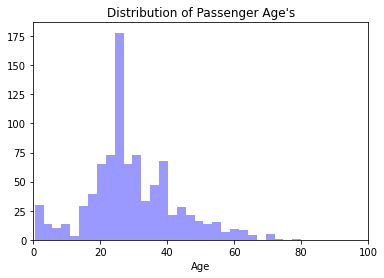

In [21]:
hist = sns.distplot(titanic_train['Age'], color='b', bins=30, kde=False)
hist.set(xlim=(0, 100), title = "Distribution of Passenger Age's")

In [22]:
titanic_train.Age.describe()

count    891.000000
mean      29.292875
std       13.210527
min        0.420000
25%       22.000000
50%       26.000000
75%       37.000000
max       80.000000
Name: Age, dtype: float64

[Text(0.5, 1.0, 'Boxplot of Age')]

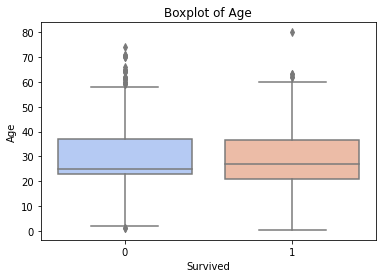

In [23]:
age_box = sns.boxplot(y = 'Age', x = 'Survived',data = titanic_train, palette='coolwarm')
age_box.set(title='Boxplot of Age')

Berdasarkan deskripsi dan histogram,penumpang dibagi dengan mean 29 dan median 26 tahun.Terlihat dari boxplot dari usia penumpang yang selamat dan tidak,distribusinya relatif serupa.

Kolom Embarked

In [24]:
titanic_train.groupby(['Embarked']).count()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare
Embarked,,,,,,,,,,
C,168,168,168,168,168,168,168,168,168,168
Q,77,77,77,77,77,77,77,77,77,77
S,646,646,646,646,646,646,646,646,646,646


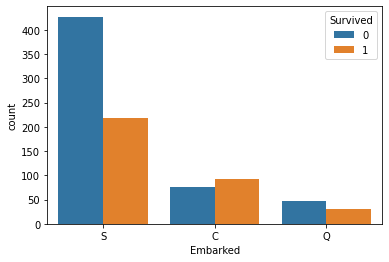

In [25]:
sns.countplot(x = 'Embarked', hue = 'Survived', data=titanic_train)

Terlihat bahwa orang yang berangkat dari S lebih mungkin untuk tidak selamat daripada orang yang tidak berangkat dari S

Kolom Pclass

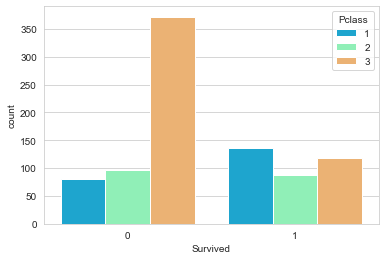

In [26]:
sns.set_style('whitegrid')
sns.countplot(x='Survived',hue='Pclass', data=titanic_train, palette = 'rainbow')

Terlihat mayoritas yang tidak selamat berada di Pclass 3.